# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

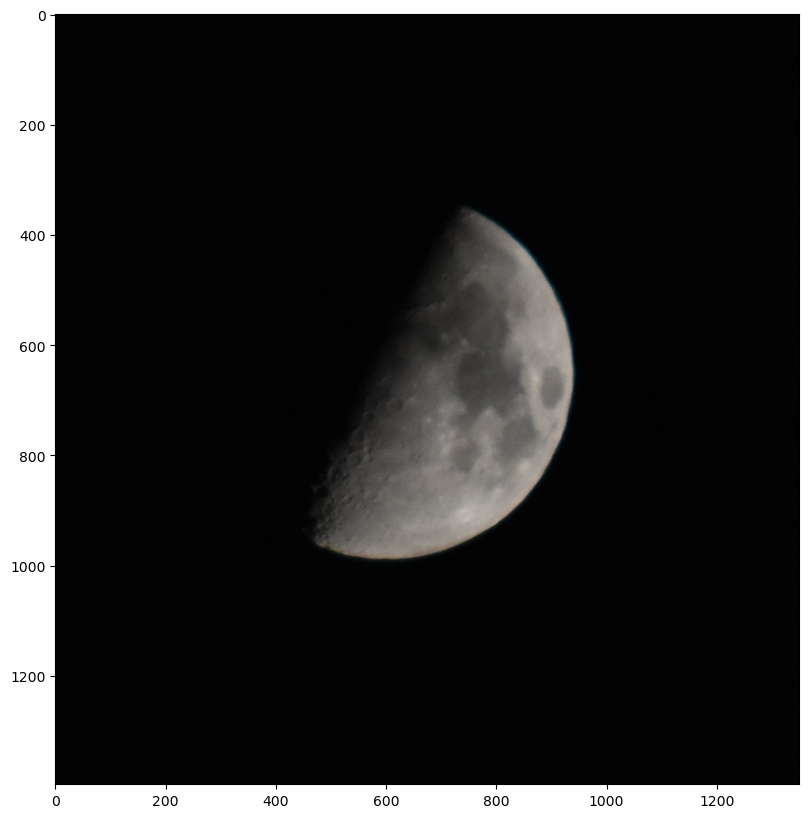

In [55]:
img = cv2.imread('../data/DSC_7301.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [68]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, ksize=(15,15), sigmaX=15)

In [69]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
img = img.astype(float)
unsharp = unsharp.astype(float)
diff = np.subtract(img, unsharp)

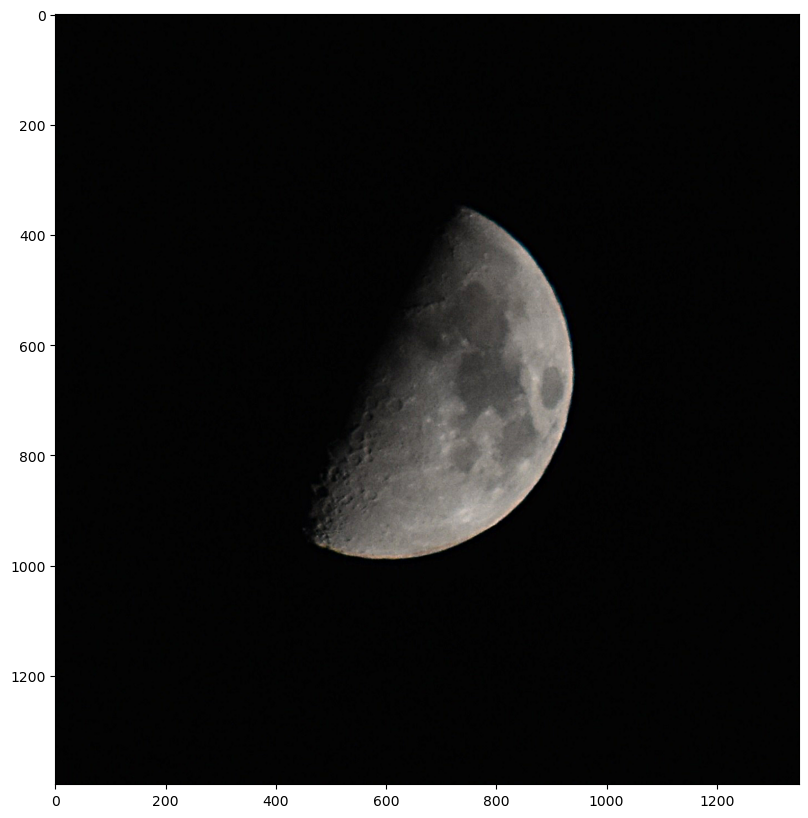

In [70]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
sharpened = np.round(np.clip(np.add(img, diff * 1.2), 0, 255)).astype(int)
plt.imshow(sharpened)

### Questions
* What is a good (reasonable) value for the `amount` parameter?\
  I think a reasonable value is between 0.5 and 2. But it can depend on the purpose of process
 * What happens if it is too small?\
   Sharpening effect will be too faint to see it
 * What happens if it is too large?\
   Additional noise appears. Also it increases contrast near edges significantly